In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy.signal import coherence
from scipy.signal import periodogram
from scipy.signal import csd
from scipy.stats import ncx2
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df, nc = 21, 1.05604659751
mean, var, skew, kurt = ncx2.stats(df, nc, moments='mvsk')

In [ ]:
var

In [ ]:
x = np.linspace(ncx2.ppf(0.01, df, nc), ncx2.ppf(0.99, df, nc), 100)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, ncx2.pdf(x, df, nc), 'r-', lw=5, alpha=0.6, label='ncx2 pdf')
vals = ncx2.ppf([0.001, 0.5, 0.999], df, nc)
r = ncx2.rvs(df, nc, size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
ax.plot(x, ncx2.pdf(x, df, nc), 'r-', lw=5, alpha=0.6, label='ncx2 pdf')

In [ ]:
 vals = ncx2.ppf([0.001, 0.5, 0.999], df, nc)

In [ ]:
np.allclose([0.001, 0.5, 0.999], ncx2.cdf(vals, df, nc))

In [ ]:
 r = ncx2.rvs(df, nc, size=1000)

In [ ]:
r

In [ ]:
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)

In [ ]:
ax.legend(loc='best', frameon=False)

In [ ]:
plt.show()

In [ ]:
1-ncx2.cdf(2*49*0.5/6, 2, 2.0/6)

In [ ]:
ncx2.sf(2*169*169*0.07719655/169, 2, 2.0/169)

In [2]:
def simulate(N):
    theta = np.random.uniform(-np.pi*0.5, np.pi*0.5, N)
    cos_val = np.mean(np.cos(theta))**2
    sin_val = np.mean(np.sin(theta)) ** 2
    return cos_val + sin_val

In [3]:
simulate(100000000)

0.40523756632064578

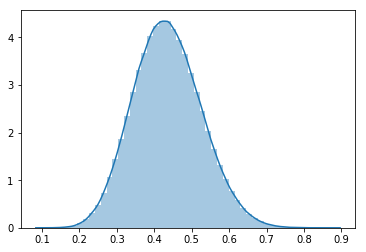

In [13]:
ans = []
for i in range(1000000):
    ans.append(simulate(20))
sns.distplot(ans)

In [14]:
import scipy as sp

In [15]:
sp.special.jv(1, 1)

0.44005058574493355

In [20]:
def angle(cov, frame):
    ans = []
    cov = cov[frame:]
    i = 0
    while i + 2 < len(cov):
        if cov[i] == cov[i + 1] == cov[i + 2] == 0:
            i += 3
            continue
        real = cov[i] - 0.5 * (cov[i + 1] + cov[i + 2])
        img = np.sqrt(3) / 2 * (cov[i + 1] - cov[i + 2])
        ans.append(np.arctan2(img, real))
        i += 3
    return ans

In [62]:
codons = np.random.poisson(2, 1772141)

In [63]:
thetas = angle(codons, 0)

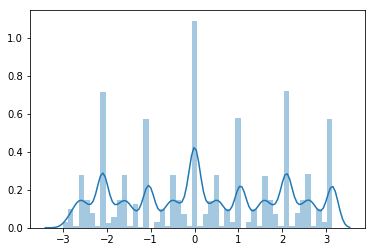

In [66]:
sns.distplot(thetas)